<a href="https://colab.research.google.com/github/jnragu/classwork/blob/main/Module3_WrittenAnalysis_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Networks Written Analyis

In this project, two network datasets are analyzed to understand the behaviors and relationships between the actors in the datasets.

## Problem 2: Investigating a time-varying criminal network

This problem studies a time-varying criminal network that is repeatedly disturbed by police forces. 

The CAVIAR investigation occured from 1994 to 1996. The mandate was to seize drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police. 

The arrests took place only at the end of the investigation. 

Eleven seized took place in the investigations. 

| Phase | Number of Seizures | Monetary losses for traffickers |  Drugs seized | 
| --- | --- | --- | --- | 
| Phase 4 | 1 seizure | \$2,500,000 | 300 kg of marijuana | 
| Phase 6 | 3 seizures | \$1,300,000 | 2 × 15 kg of marijuana + 1 × 2 kg |  
| Phase 7 | 1 seizure | \$3,500,000 | 401 kg of marijuana |
| Phase 8 | 1 seizure | \$360,000 | 9 kg of cocaine | 
Phase 9 | 2 seizures | \$4,300,000 | 2 kg of cocaine + 1 × 500 kg marijuana |

The network consists of `110` (numbered) players. 

Players `1-82` are traffickers. Players `83-110` are non-traffickers (financial investors, accountants, owners of importation businesses).

## The "Sereno Organization" 

Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.


The police discovered the role of 23 of the players in the "Serero organization". 

| Player | Name | Role |
| --- | --- | --- |
| n1 | Daniel Sereno | Mastermind of the network |
| n3 | Pierre Perlini | Principal lieutenant of Sereno, he executes Serero's instructions |
| n83 | Alain Levy | Investor and transporter of money |
| n86 | Gérard Levy | Investor and transporter of money |
| n85 | Wallace Lee | Takes care of financial affairs (accountant) |
| n6 | Gaspard Lino | Broker in Spain |
| n11 | Samir Rabbat | Provider in Morocco |
| n88 | Lee Gilbert | Trusted man of Wallace Lee (became an informer after the arrest |
| n106 | Beverly Ashton | Souse of Lino, transports money and documents |
| n89 | Antonio Iannacci | Investor |
| n84 | Mohammed Echouafni | Moroccan investor |
| n5 | Richard Gleeson | Recuperated marijuana |
| n8 | Bruno de Quinzio | Recuperated marijuana |
| n76 | Gabrielle Casale | Recuperated marijuana |
| n77 | Roderik Janouska | Individual with airport contacts |
| n87 | Patrick Lee | Investor |
| n82 | Salvatore Panetta | Transports arrangements manager |
| n96 | Steve Cunha | Transport manager, owner of legitimate import company (became an informer after the arrest)|
| n12 | Ernesto Morales | Principal organizer of the cocain import, intermediary between the Colombias and the Sereno organization |
| n17 | Oscar Nieri | The handyman of Morales |
| n80 | Richard Brebner | Was transporting the cocaine from the US to Montréal |
| n33 | Ricardo Negrinotti | Was taking possession of the cocaine in the US to hand it to Brebner |
| n16 | Johnny Pacheco | Cocaine provider |



In [ ]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

### Size of network at each phase

In [ ]:
G_summaries = {'Nodes': [], 'Edges': []}
for i in range(1, 12):
  G_summaries['Nodes'].append(G[i].number_of_nodes())
  G_summaries['Edges'].append(G[i].number_of_edges())

G_summaries = pd.DataFrame(G_summaries, range(1, 12))
G_summaries

,Nodes,Edges
1,15,18
2,24,28
3,33,56
4,33,48
5,32,39
6,27,47
7,36,49
8,42,58
9,34,44
10,42,50


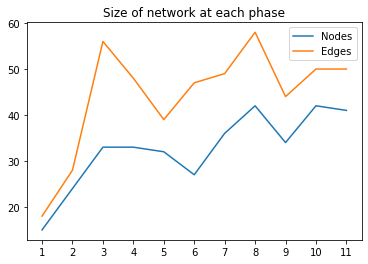

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(G_summaries['Nodes'], label = 'Nodes')
plt.plot(G_summaries['Edges'], label = 'Edges')
plt.xticks(G_summaries.index)
plt.title('Size of network at each phase')
plt.legend()
plt.show()

## Visualizing the graph at each phase

In [ ]:
! apt-get install graphviz graphviz-dev && pip install pygraphviz

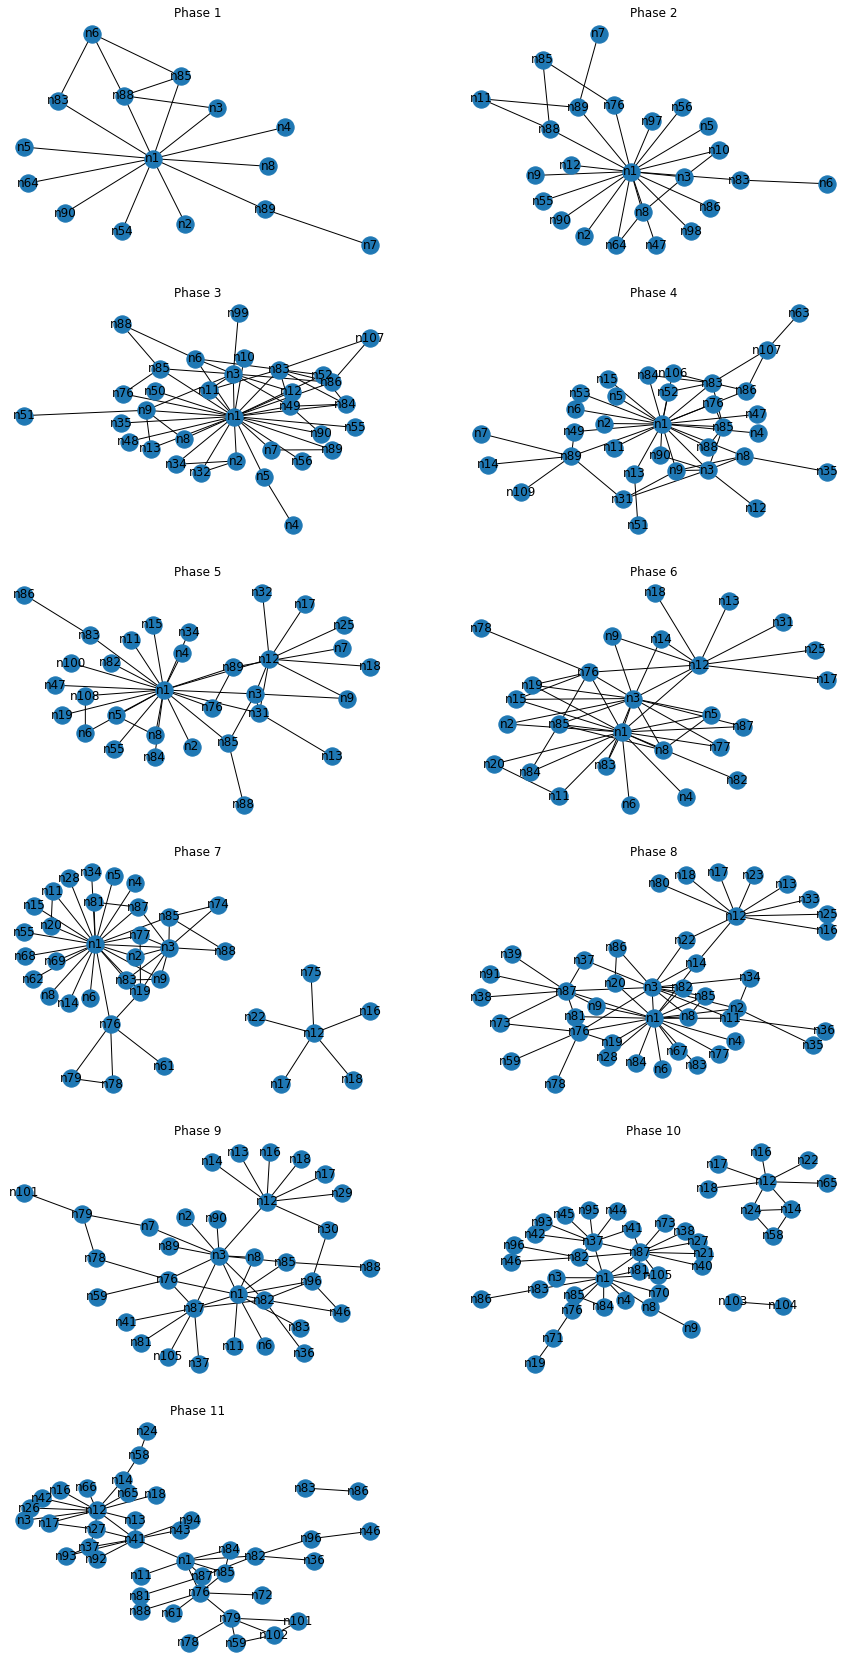

In [ ]:
count = 1
plt.subplots(figsize = (15, 30))
for i in range(1, 12):
  plt.subplot(6, 2, count)
  nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), with_labels = True)  
  plt.title(f'Phase {i}')
  count += 1 

## Degree centrality

The normalized degree centrality of node $i$ is defined as
$$
  \tilde k_i = \frac{k_i}{n-1}
$$
where $k_i$ is the degree of node $i$ and $n$ is the number of nodes in the graph. 

In [ ]:
degree_centrality = []
for graph in G.values():
  degree_centrality.append(nx.degree_centrality(graph))

degree_centrality = pd.DataFrame(degree_centrality)
degree_centrality

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,...,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
0,0.857143,0.071429,0.142857,0.142857,0.142857,0.071429,0.285714,0.214286,0.071429,0.071429,0.071429,0.071429,0.214286,0.071429,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.826087,NaN,0.130435,0.086957,0.130435,0.043478,0.130435,0.086957,0.043478,0.043478,0.043478,NaN,0.043478,0.086957,0.130435,0.043478,0.043478,0.086957,0.043478,0.043478,0.043478,0.043478,0.086957,0.043478,0.086957,0.043478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.843750,0.031250,0.062500,0.250000,0.281250,0.062500,0.062500,0.125000,0.062500,0.093750,0.062500,NaN,0.125000,NaN,0.062500,0.125000,0.031250,0.031250,0.031250,NaN,NaN,NaN,0.062500,0.156250,0.093750,0.062500,0.03125,0.062500,0.03125,0.062500,0.125000,0.15625,0.06250,0.03125,0.03125,0.062500,0.03125,0.09375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.718750,0.031250,0.187500,0.218750,0.218750,0.031250,0.062500,0.156250,0.062500,0.031250,0.031250,NaN,0.031250,NaN,0.125000,0.093750,NaN,NaN,NaN,NaN,0.031250,NaN,0.062500,0.125000,0.031250,0.031250,NaN,NaN,0.03125,NaN,0.062500,0.06250,0.09375,NaN,NaN,0.062500,0.03125,0.06250,0.03125,0.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.709677,0.032258,0.096774,0.064516,0.161290,0.064516,0.032258,0.096774,NaN,0.032258,0.032258,NaN,0.064516,NaN,0.064516,0.032258,0.032258,NaN,NaN,NaN,0.032258,NaN,0.064516,0.064516,0.032258,0.258065,NaN,0.032258,NaN,0.032258,0.032258,NaN,NaN,NaN,NaN,0.032258,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.692308,0.038462,NaN,0.076923,0.538462,0.115385,NaN,0.192308,NaN,0.076923,NaN,NaN,0.038462,NaN,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269231,0.076923,0.076923,0.384615,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,0.038462,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.685714,0.028571,NaN,0.085714,0.285714,0.028571,0.057143,0.114286,NaN,0.057143,NaN,NaN,0.028571,NaN,0.028571,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,0.142857,0.085714,0.057143,0.142857,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.487805,0.024390,NaN,0.024390,0.317073,NaN,NaN,0.073171,NaN,0.097561,NaN,NaN,0.024390,NaN,0.073171,0.048780,NaN,NaN,NaN,NaN,NaN,NaN,0.146341,0.048780,0.073171,0.243902,NaN,0.048780,0.02439,NaN,0.024390,NaN,NaN,NaN,NaN,0.024390,NaN,NaN,NaN,NaN,...,0.02439,0.02439,0.04878,0.02439,0.024390,0.048780,0.02439,0.02439,0.02439,0.02439,0.024390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.303030,NaN,0.030303,0.030303,0.333333,NaN,0.030303,0.090909,0.030303,0.030303,0.060606,NaN,0.030303,NaN,0.060606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151515,NaN,0.030303,0.242424,NaN,NaN,

The degree of a node is total number of connections that particular node has to other nodes. The normalized degree centrality compares each nodes' degree to the total number of nodes in the graph. By comparing the normalized degree centralities of the nodes in the network to each other, the normalized degree centrality identifies the nodes that have the most connections, which ultimately shows which nodes are more important than others. 

In the context of criminal networks, if a player has a large normalized degree centrality, the police force may be able to come to the conclusion that the player may be a central player, such as a source of drugs, since many of the players interact with the player with the large normalized degree centrality. 

#### Degree centrality limitations
Even though degree centrality can give an idea of which nodes are important, the measure itself is not enough to confidently determine the important nodes since the measure does not take into account the context of the connections. Degree centrality can be used for initial data exploration, to get a general idea of which nodes are of higher importance. Afterwards, the reason behind the node connections need to be accounted for when analyzing data.

## Betweeness Centrality

For undirected graphs, the normalized betweenness centrality for node $i$ is defined as 
$$
\tilde B_i = \frac{2}{(n-1)(n-2)}\sum_{s \not = i \not = t}^{}{\frac{n^i_{st}}{g_{st}}}
$$
where $n^i_{st}$ is the number of shortest paths between $s$ and $t$ that pass through $i$
and where $g_{st}$ is the total number of shortest paths between $s$ and $t$. 

In [ ]:
betweenness_centrality = []
for graph in G.values():
  betweenness_centrality.append(nx.betweenness_centrality(graph, normalized = True))

betweenness_centrality = pd.DataFrame(betweenness_centrality)
betweenness_centrality

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,...,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
0,0.906593,0.0,0.142857,0.036630,0.000000,0.0000,0.053114,0.036630,0.0,0.000000,0.000000,0.0,0.010989,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.942688,NaN,0.123847,0.086957,0.001976,0.0000,0.083004,0.003294,0.0,0.000000,0.000000,NaN,0.000000,0.0,0.001976,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038208,0.000000,0.006588,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.829503,0.0,0.000000,0.046573,0.095497,0.0625,0.000672,0.029973,0.0,0.001008,0.000000,NaN,0.033333,NaN,0.000000,0.028024,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.067540,0.000806,0.000000,0.0,0.0,0.0,0.0,0.000672,0.007527,0.0000,0.0,0.0,0.0000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.839310,0.0,0.196213,0.079589,0.090438,0.0000,0.000000,0.016537,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.062500,0.047427,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.014761,0.000000,0.000000,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0625,NaN,NaN,0.0625,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.883871,0.0,0.064516,0.064516,0.044086,0.0000,0.000000,0.064516,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.269892,NaN,0.0,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.542564,0.0,NaN,0.000000,0.227179,0.0000,NaN,0.010256,NaN,0.000000,NaN,NaN,0.000000,NaN,0.001026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098462,0.000000,0.000000,0.382051,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.589356,0.0,NaN,0.000000,0.073389,0.0000,0.000000,0.031653,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.134454,0.000000,0.000000,0.016807,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.553659,0.0,NaN,0.000000,0.314634,NaN,NaN,0.000000,NaN,0.055285,NaN,NaN,0.000000,NaN,0.000000,0.002033,NaN,NaN,NaN,NaN,NaN,NaN,0.118293,0.000000,0.048780,0.356707,NaN,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,0.0,0.0,0.004878,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.249053,NaN,0.000000,0.000000,0.576231,NaN,0.000000,0.060606,0.0,0.000000,0.087753,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131944,NaN,0.000000,0.357323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.038984,0.0,0.0,0.019886,0.0,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.342683,0.0,NaN,0.035366,0.000000,NaN,NaN,

In the context of criminal networks, the betweenness centrality could be a measure to determine players who are important to the distribution of drugs. For example, the players with higher betweenness centrality may be players who distribute drugs from an import source to dealers. 

## Eigenvector Centrality 

The eigenvector centrality takes into account a node's neighbor's connectedness. The measure is determined by the number of a node's neighbor's connections. For example, when comparing two nodes with the same number of connections, the node that has a neighbor who is more highly connected will have a higher eigenvector centrality. 

The eigenvector centrality is normalized as 
$$
\sqrt{\sum_{i}^{}{v_i^2}} = 1
$$

In [ ]:
eigenvector_centrality = []
for graph in G.values():
  eigenvector_centrality.append(nx.degree_centrality(graph))

eigenvector_centrality = pd.DataFrame(eigenvector_centrality)
eigenvector_centrality

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,...,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
0,0.857143,0.071429,0.142857,0.142857,0.142857,0.071429,0.285714,0.214286,0.071429,0.071429,0.071429,0.071429,0.214286,0.071429,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.826087,NaN,0.130435,0.086957,0.130435,0.043478,0.130435,0.086957,0.043478,0.043478,0.043478,NaN,0.043478,0.086957,0.130435,0.043478,0.043478,0.086957,0.043478,0.043478,0.043478,0.043478,0.086957,0.043478,0.086957,0.043478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.843750,0.031250,0.062500,0.250000,0.281250,0.062500,0.062500,0.125000,0.062500,0.093750,0.062500,NaN,0.125000,NaN,0.062500,0.125000,0.031250,0.031250,0.031250,NaN,NaN,NaN,0.062500,0.156250,0.093750,0.062500,0.03125,0.062500,0.03125,0.062500,0.125000,0.15625,0.06250,0.03125,0.03125,0.062500,0.03125,0.09375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.718750,0.031250,0.187500,0.218750,0.218750,0.031250,0.062500,0.156250,0.062500,0.031250,0.031250,NaN,0.031250,NaN,0.125000,0.093750,NaN,NaN,NaN,NaN,0.031250,NaN,0.062500,0.125000,0.031250,0.031250,NaN,NaN,0.03125,NaN,0.062500,0.06250,0.09375,NaN,NaN,0.062500,0.03125,0.06250,0.03125,0.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.709677,0.032258,0.096774,0.064516,0.161290,0.064516,0.032258,0.096774,NaN,0.032258,0.032258,NaN,0.064516,NaN,0.064516,0.032258,0.032258,NaN,NaN,NaN,0.032258,NaN,0.064516,0.064516,0.032258,0.258065,NaN,0.032258,NaN,0.032258,0.032258,NaN,NaN,NaN,NaN,0.032258,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.692308,0.038462,NaN,0.076923,0.538462,0.115385,NaN,0.192308,NaN,0.076923,NaN,NaN,0.038462,NaN,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269231,0.076923,0.076923,0.384615,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,0.038462,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.685714,0.028571,NaN,0.085714,0.285714,0.028571,0.057143,0.114286,NaN,0.057143,NaN,NaN,0.028571,NaN,0.028571,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,0.142857,0.085714,0.057143,0.142857,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.487805,0.024390,NaN,0.024390,0.317073,NaN,NaN,0.073171,NaN,0.097561,NaN,NaN,0.024390,NaN,0.073171,0.048780,NaN,NaN,NaN,NaN,NaN,NaN,0.146341,0.048780,0.073171,0.243902,NaN,0.048780,0.02439,NaN,0.024390,NaN,NaN,NaN,NaN,0.024390,NaN,NaN,NaN,NaN,...,0.02439,0.02439,0.04878,0.02439,0.024390,0.048780,0.02439,0.02439,0.02439,0.02439,0.024390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.303030,NaN,0.030303,0.030303,0.333333,NaN,0.030303,0.090909,0.030303,0.030303,0.060606,NaN,0.030303,NaN,0.060606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151515,NaN,0.030303,0.242424,NaN,NaN,

In the context of criminal networks, eigenvector centrality can identify players who are important, but may not be as directly involved. For example, a player like an investor to a group or many groups of traffickers may have a small number of connections themselves since they only deal with the with leaders of the trafficking groups. 


## Most relevent measure 

Eigenvector centrality, in the context of criminal networks, is the most relevant to identify who is running the illegal activities of the group. The leaders of drug trafficking groups typically will only interact with trusted sources or those who are higher up in the trafficking chain. Many dealers themselves do not know who the ultimate organizer is, since their source may get supply from another source who gets supply from another. The leaders of the groups typically organize so their identity is hidden as well as possible, so not to be caught. Since eigenvector centrality accounts for the connectedness of a node's neighbor, the measure will account for a well-hidden leader whose subordinate is a supply distributor to many dealers. 

## What algorithm is the fastest for this dataset?

In [ ]:
import time 

calculation_times = {'Degree Centrality': 0, 'Betweenness Centrality': 0, 'Eigenvector Centrality': 0}

start = time.time()
nx.degree_centrality(G[1])
end = time.time()
calculation_times['Degree Centrality'] = end - start
start = time.time()
nx.betweenness_centrality(G[1], normalized = True)
end = time.time()
calculation_times['Betweenness Centrality'] = end - start

start = time.time()
nx.eigenvector_centrality(G[1])
end = time.time()
calculation_times['Eigenvector Centrality'] = end - start

calculation_times

{'Betweenness Centrality': 0.0012402534484863281,
 'Degree Centrality': 8.7738037109375e-05,
 'Eigenvector Centrality': 0.0009236335754394531}

The degree centrality algorithm is the fastest for this dataset. 

Degree centrality is $\mathcal O(n^2)$ while betweeness and eigenvector centralities are $\mathcal O(n^3)$. 

## Temporal consistency of a player's centrality

To find the temporal consistency of each player, find the mean centrality of each of the centrality metrics, accross all phases, for each player is calculated. 

The temporal consistency finds which players consistently remained active and central throughout most of the phases. 

In [ ]:
# Replace all null values with 0 

degree_centrality = degree_centrality.fillna(0)
betweenness_centrality = betweenness_centrality.fillna(0)
eigenvector_centrality = eigenvector_centrality.fillna(0)

#### Degree Centrality

In [ ]:
degree_centrality.mean().sort_values(ascending = False)

n1     0.601485
n3     0.223505
n12    0.170893
n85    0.118010
n76    0.112235
         ...   
n80    0.002217
n33    0.002217
n23    0.002217
n67    0.002217
n39    0.002217
Length: 107, dtype: float64

#### Betweenness Centrality

In [ ]:
betweenness_centrality.mean().sort_values(ascending = False)

n1     0.655051
n12    0.167562
n3     0.129403
n76    0.083791
n87    0.061327
         ...   
n38    0.000000
n39    0.000000
n59    0.000000
n23    0.000000
n77    0.000000
Length: 107, dtype: float64

#### Eigenvector Centrality

In [ ]:
eigenvector_centrality.mean().sort_values(ascending = False)

n1     0.601485
n3     0.223505
n12    0.170893
n85    0.118010
n76    0.112235
         ...   
n80    0.002217
n33    0.002217
n23    0.002217
n67    0.002217
n39    0.002217
Length: 107, dtype: float64

Player 1 has the largest mean for each of the three centrality measures. 

Player 3 had one of the largest three means for all of the measures. Player 3 had the second largest mean for betweenness centrality and eigenvector centrality and the third largest mean for betweenness centrality. 

Player 12 had one of the largest three means for all of the measures Player 12 had the second largest mean for betweenness centrality and the third largest mean for degree and eigenvector centrality. 

In [ ]:
top_three = {'Degree Centrality': degree_centrality[['n1', 'n12', 'n3']].mean(),
             'Betweenness Centrality': betweenness_centrality[['n1', 'n12', 'n3']].mean(),
             'Eigenvector Centrality': eigenvector_centrality[['n1', 'n12', 'n3']].mean() 
             }

pd.DataFrame(top_three)

,Degree Centrality,Betweenness Centrality,Eigenvector Centrality
n1,0.601485,0.655051,0.601485
n12,0.170893,0.167562,0.170893
n3,0.223505,0.129403,0.223505


Three players consistently had the top three means for each centrality measure. Player 1 had the largest mean for each of the three centrality measures. Player 3 had the second largest mean for betweenness centrality and eigenvector centrality. Player 12 had the second largest mean for betweenness centrality and the third largest mean for degree and eigenvector centrality. 

Using the largest mean centrality as a measure of importance, Player 1, 3, and 12 can be identified as key players in the illegal activity operations. Taking a closer look at the mean centrality scores, the centrality drops significantly from Player 1 to the rest of the players, which means that although all three players have high connectedness compared to the other players in the network, Player 1 is the most connected. Therefore, the police force can determine that Player 1 is most likely for running the illegal activities of the group, since Player 1 is involved with many more players than the rest. Even though the centrality measures cannot conclude that Player 1 is a leader, Player 1 is most likely responsible for much of what keeps the illegal activities organized. For example, Player 1 might be the individual who distributes the drugs to the groups or relays messages. Without this player, the illegal activities group would lose a key component in their operations. 

## Significant change between Phase 4 and 5

The significant in the network from Phase 4 to Phase 5 looks like a reorganization of the criminal group. Most of the players do not appear in both phases, with an exception. Not only does Player 1 appear in both phases, the player is the central node. The major event during the investigation most likely forced the criminal group to find new individuals for their activities. Since the police force had already discovered the criminal group

Text(0.5, 1.0, 'Phase 5')

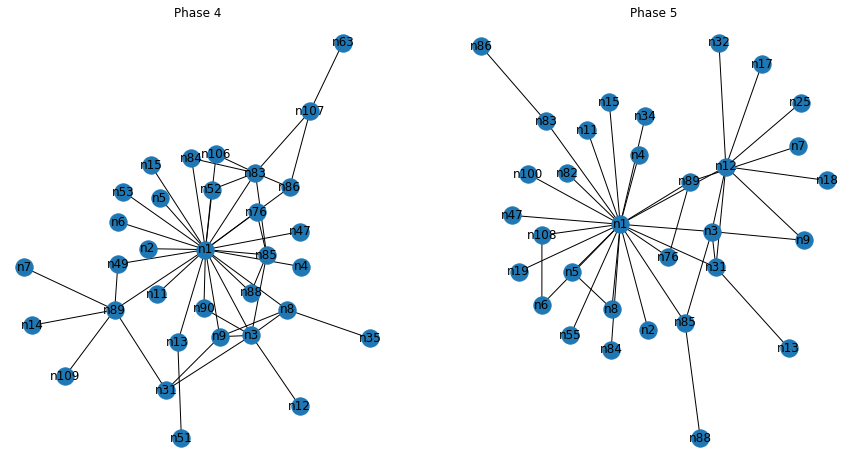

In [ ]:
plt.subplots(figsize = (15, 8))

plt.subplot(1, 2, 1)
nx.draw(G[4], pos=nx.drawing.nx_agraph.graphviz_layout(G[4]), with_labels = True)  
plt.title('Phase 4')

plt.subplot(1, 2, 2)
nx.draw(G[5], pos=nx.drawing.nx_agraph.graphviz_layout(G[5]), with_labels = True)  
plt.title('Phase 5')

## Global Trends

By observing the graphs at each phases, Phase 1 to 4 are very similar, which means the same players were active during these four phases. This aligns with the story when Daniel Sereno, the alleged mastermind of this drug network, attempts to import marijuana to Canada from Morocco, transiting through Spain. 

Text(0.5, 1.0, 'Phase 4')

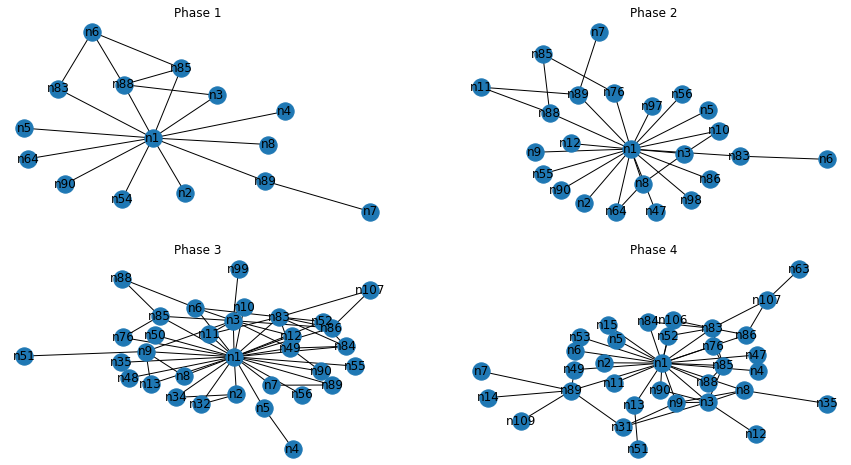

In [ ]:
plt.subplots(figsize = (15, 8))

plt.subplot(2, 2, 1)
nx.draw(G[1], pos=nx.drawing.nx_agraph.graphviz_layout(G[1]), with_labels = True)  
plt.title('Phase 1')

plt.subplot(2, 2, 2)
nx.draw(G[2], pos=nx.drawing.nx_agraph.graphviz_layout(G[2]), with_labels = True)  
plt.title('Phase 2')

plt.subplot(2, 2, 3)
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels = True)  
plt.title('Phase 3')

plt.subplot(2, 2, 4)
nx.draw(G[4], pos=nx.drawing.nx_agraph.graphviz_layout(G[4]), with_labels = True)  
plt.title('Phase 4')

After Phase 4, traffickers reoriented to cocaine import from Columbia, transiting through the United States. Visually, the graphs align with the story and demonstrate the change of import sources: after Phase 4, the graphs visually change, with different players except for Player 1.



Text(0.5, 1.0, 'Phase 8')

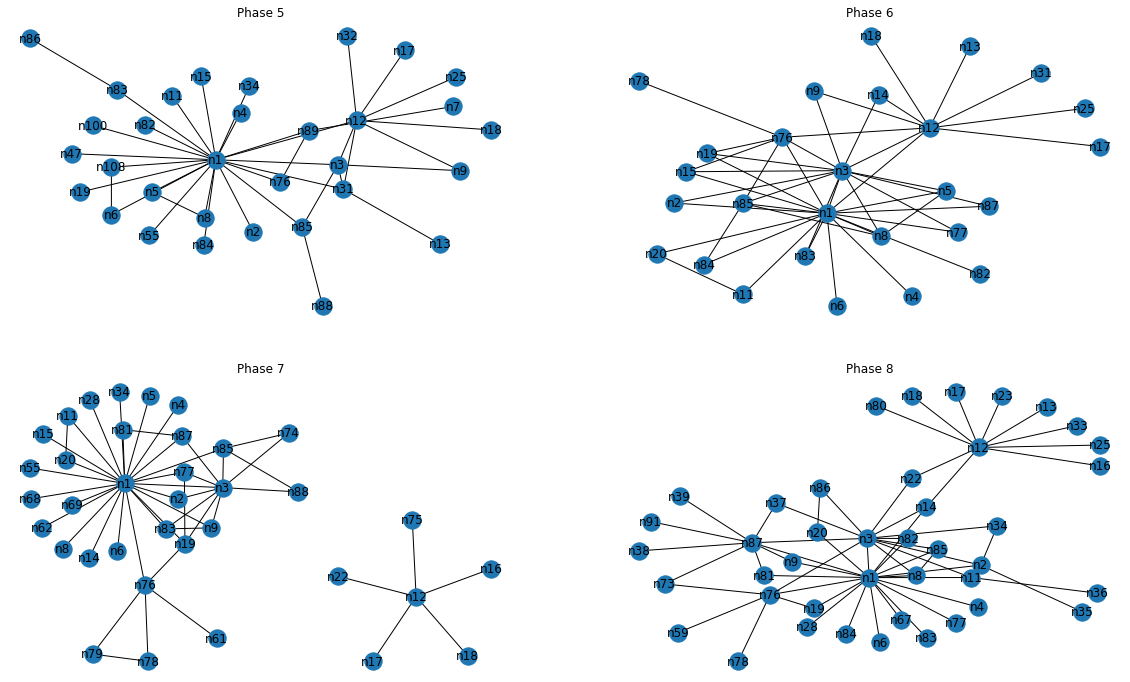

In [ ]:
plt.subplots(figsize = (20, 12))

plt.subplot(2, 2, 1)
nx.draw(G[5], pos=nx.drawing.nx_agraph.graphviz_layout(G[5]), with_labels = True)  
plt.title('Phase 5')

plt.subplot(2, 2, 2)
nx.draw(G[6], pos=nx.drawing.nx_agraph.graphviz_layout(G[6]), with_labels = True)  
plt.title('Phase 6')

plt.subplot(2, 2, 3)
nx.draw(G[7], pos=nx.drawing.nx_agraph.graphviz_layout(G[7]), with_labels = True)  
plt.title('Phase 7')

plt.subplot(2, 2, 4)
nx.draw(G[8], pos=nx.drawing.nx_agraph.graphviz_layout(G[8]), with_labels = True)  
plt.title('Phase 8')

## Directed vs Undirected Graphs

The advantage of looking at the directed graph versus an undirected graph is that the  directed graph explicitly denotes the direction of the connection. In the context of the criminal network, the directed graph can denote the direction of the flow of instructions given to individual players.

## Hubs and Authorities

Two interdependent notions of centrality are hub and authority. An important hub is a node that points to many important authorities. An important authority is one that is point to by many important hubs. 

The initial assignment of hub and authority scores for every node are $\pmb{x}^0$ and $(\pmb{y}^0)^T$, respectively.

They are then updated as follows
$$
\begin{align*}
	\pmb{x}^{k+1} &= \alpha A \pmb{y}^k \\
  (\pmb{y}^{k+1})^T &= \beta (\pmb{x}^{k+1})^T A
\end{align*}
$$

Choosing $\alpha\beta = \frac{1}{\lambda_{\max}}(AA^T)$

We can show that $\pmb{x}^k \rightarrow \pmb{v}$ and $(\pmb{y}^k)^T \rightarrow \pmb{w}^T$

Where $ A^ T A \pmb{w} = \lambda _{\text {max}}(A^ T A) \pmb{w}$.

In fact, the non-zero eigenvalues of $AA^T$ an $A^TA$ are the same and $\pmb{w} = A^T\pmb{w}$


In [ ]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  G[i] = nx.from_pandas_adjacency(phases[i], create_using = nx.DiGraph())
  G[i].name = var_name

hubs = []
authorities = []
for graph in G.values():
  hub, authority = nx.algorithms.link_analysis.hits(graph, max_iter = 1000000)
  hubs.append(hub)
  authorities.append(authority)

In [ ]:
hubs = pd.DataFrame(hubs)
hubs.index += 1
authorities = pd.DataFrame(authorities)
authorities.index += 1

### How does the relationship between n1 and n3 evolve over the phases?

In [ ]:
hubs[['n1', 'n3']]

,n1,n3
1,7.030619e-01,1.436007e-02
2,9.729552e-01,7.635780e-03
3,7.930997e-01,4.625123e-02
4,8.597937e-01,2.396762e-02
5,9.064976e-01,1.053611e-02
6,8.049138e-03,1.952896e-01
7,6.806783e-03,3.433216e-01
8,8.258785e-01,1.737960e-02
9,5.879336e-01,1.394655e-01
10,1.355928e-09,1.171597e-11


In [ ]:
authorities[['n1', 'n3']]

,n1,n3
1,1.181048e-02,1.357143e-01
2,2.685569e-04,3.367044e-01
3,3.152634e-03,1.495651e-01
4,2.160548e-03,2.754663e-01
5,5.813636e-04,3.235857e-01
6,8.054191e-01,3.209004e-02
7,7.274223e-01,6.894124e-03
8,2.038102e-03,4.671711e-01
9,1.615692e-02,6.749387e-02
10,2.970789e-10,9.121261e-11


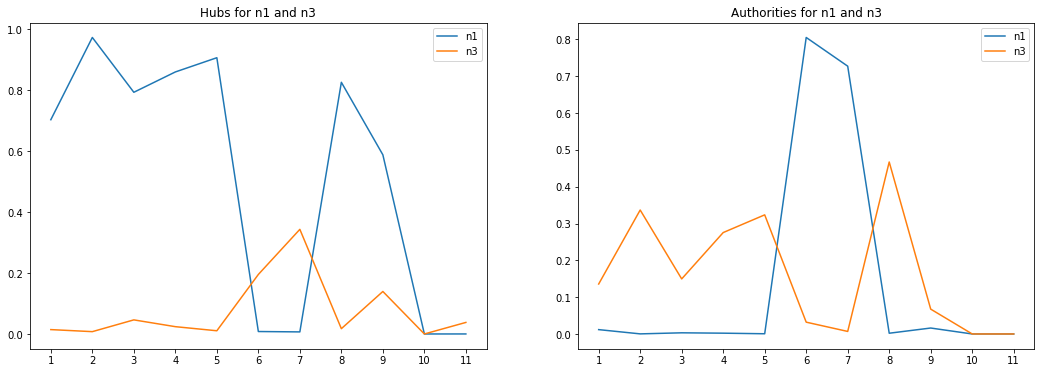

In [ ]:
plt.subplots(figsize = (18, 6))

plt.subplot(1, 2, 1)
plt.plot(hubs['n1'], label = 'n1')
plt.plot(hubs['n3'], label = 'n3')
plt.xticks(hubs.index)
plt.title('Hubs for n1 and n3')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(authorities['n1'], label = 'n1')
plt.plot(authorities['n3'], label = 'n3')
plt.xticks(authorities.index)
plt.title('Authorities for n1 and n3')
plt.legend()


## Co-offending Network

Analyze another set of criminal data.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Cooffending.csv')
df.CrimeDate = pd.to_datetime(df.CrimeDate)
df['NumberOffenders'] = df.NumberYouthOffenders + df.NumberAdultOffenders

# Drop duplicates
df = df.drop_duplicates() 
df.drop_duplicates(subset = ['OffenderIdentifier', 'CrimeIdentifier'])
n_cases = len(df)
n_criminals = len(df.OffenderIdentifier.unique())
n_crimes = len(df.CrimeIdentifier.unique())

print('Number of cases: ', n_cases)
print('Number of criminals: ', n_criminals)
print('Number of crimes: ', n_crimes)

Number of cases:  1279992
Number of criminals:  539593
Number of crimes:  1164836


In [ ]:
df.drop_duplicates('CrimeIdentifier').groupby(['CrimeYear']).agg(['count'])[['CrimeIdentifier']]

,CrimeIdentifier
,count
CrimeYear,
2003,110556
2004,121374
2005,172664
2006,185840
2007,196151
2008,199288
2009,178959
2010,4


2008 has the most crimes, with 199288 crimes. 

## Build the co-offender network

The data can be represented by a binary matrix $A$ where the rows correspond to persons and columns to crimes

In [ ]:
import numpy as np

vals = np.ones(df.shape[0])
row = df['OffenderIdentifier'].to_numpy()
col = df['CrimeIdentifier'].to_numpy()

In [ ]:
from scipy.sparse import csr_matrix

crime_matrix = csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))
crime_matrix

cooffend_matrix = crime_matrix @ crime_matrix.T
cooffend_matrix_raw = cooffend_matrix.copy()

# Remove the weighting
cooffend_matrix[cooffend_matrix > 0] = 1
cooffend_matrix.setdiag(0)
cooffend_matrix.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
import networkx as nx

# Convert the co-offending adjaceny matrix to a graph
graph = nx.convert_matrix.from_scipy_sparse_matrix(cooffend_matrix)

In [ ]:
# Function that returns information for a graph (number of nodes and edges)
def graph_stats(graph):
  stats = 'Composition of the graph: ' + str(len(graph.nodes())) + ' nodes, ' + str(len(graph.edges())) + ' edges'
  return(stats)

graph_stats(graph)

'Composition of the graph: 670537 nodes, 178413 edges'

## Remove the isolated nodes of the graph

In [ ]:
g_removed = graph.copy()
g_removed.remove_nodes_from(list(nx.isolates(g_removed)))

In [ ]:
degrees = sorted([d for n, d in g_removed.degree()], reverse = True)
mean = np.average(np.array(degrees))
print('The mean of node degrees: ', mean)

The mean of node degrees:  2.945105192350548


In [ ]:
degree_geq_100 = np.sum(np.array(degrees) >= 100)
print('Number of nodes with degree >= 100: ', degree_geq_100)

Number of nodes with degree >= 100:  265


In [ ]:
components = sorted(nx.connected_components(g_removed), key = len, reverse = True)
print('Number of connected components: ', len(components))

Number of connected components:  36098


In [ ]:
largest_component = g_removed.subgraph(components[0])
print('Number of nodes in the largest component: ', largest_component.number_of_nodes())

Number of nodes in the largest component:  19924


## Pairs who co-offend at least twice 

Consider the network consisting of all nodes in $G$, but only containing the edges that correspond to pairs of offenders who co-offend together at least twice (that is, they repeatedly co-offend together)

Remove all isolated nodes and call $G_r$ the remaining graph. 

To construct the non-repeating co-offending graph (the offenders may commit more than one crime, but never with the same person twice) $G_{nr}$, take only edges in $G$ corresponding to pairs of offenders who only cooffend together exactly once, and remove the resulting isolated nodes. 

In [ ]:
# Separate matrices for repeating co-offenders vs non-repeating co-offenders
cooffend_matrix_repeat = cooffend_matrix_raw.copy()
cooffend_matrix_no_repeat = cooffend_matrix_raw.copy()

# Repeating co-offenders: edge strength >= 2
cooffend_matrix_repeat.data[np.where(cooffend_matrix_repeat.data < 2)[0]] = 0
cooffend_matrix_repeat[cooffend_matrix_repeat > 0] = 1
cooffend_matrix_repeat.setdiag(0)
cooffend_matrix_repeat.eliminate_zeros() # To avoid self loops since set diag(0) does not itself change the sparsity pattern

# Non-repeating co-offenders: edge strength = 1
cooffend_matrix_no_repeat.data[np.where(cooffend_matrix_no_repeat.data!= 1)[0]] = 0
cooffend_matrix_no_repeat[cooffend_matrix_no_repeat > 0] = 1
cooffend_matrix_no_repeat.setdiag(0)
cooffend_matrix_no_repeat.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
g_r = nx.from_scipy_sparse_matrix(cooffend_matrix_repeat)
g_nr = nx.from_scipy_sparse_matrix(cooffend_matrix_no_repeat)

g_r.remove_nodes_from(list(nx.isolates(g_r)))
g_nr.remove_nodes_from(list(nx.isolates(g_nr)))

In [ ]:
print('Number of nodes in G_r: ', g_r.number_of_nodes())
print('Number of nodes in G_nr: ', g_nr.number_of_nodes())

Number of nodes in G_r:  17769
Number of nodes in G_nr:  113518


In [ ]:
print('Number of edges in G_r: ', g_r.number_of_edges())
print('Number of edges in G_nr: ', g_nr.number_of_edges())

Number of edges in G_r:  15452
Number of edges in G_nr:  162961


In [ ]:
g_r_components = sorted(nx.connected_components(g_r), key = len, reverse = True)
g_nr_components = sorted(nx.connected_components(g_nr), key = len, reverse = True)

print('Number of connected components in G_r: ', len(g_r_components))
print('Number of connected components in G_nr: ', len(g_nr_components))

Number of connected components in G_r:  6464
Number of connected components in G_nr:  35596


In [ ]:
g_r_component_size = np.mean(list(map(len, g_r_components)))
g_nr_component_size = np.mean(list(map(len, g_nr_components)))

print('Average component size for G_r: ', g_r_component_size)
print('Average component size for G_nr: ', g_nr_component_size)

Average component size for G_r:  2.7489170792079207
Average component size for G_nr:  3.1890661872120463


In [ ]:
g_r_largest_component = g_r.subgraph(g_r_components[0])
g_nr_largest_component = g_nr.subgraph(g_nr_components[0])

print('Fraction of nodes in largest component of G_r: ', g_r_largest_component.number_of_nodes()/float(g_r.number_of_nodes()))
print('Fraction of nodes in largest component of G_nr: ', g_nr_largest_component.number_of_nodes()/float(g_nr.number_of_nodes()))


Fraction of nodes in largest component of G_r:  0.003714333952388992
Fraction of nodes in largest component of G_nr:  0.10646769675293787


In [ ]:
largest_density_G = nx.density(largest_component)
largest_density_G_r = nx.density(g_r_largest_component)
largest_density_G_nr = nx.density(g_nr_largest_component)

print('Density of largest component of G: ', largest_density_G)
print('Density of largest component of G_r: ', largest_density_G_r)
print('Density of largest component of G_nr: ', largest_density_G_nr)

Density of largest component of G:  0.0003556454848657796
Density of largest component of G_r:  0.04568764568764569
Density of largest component of G_nr:  0.0007231308979893168


## Clustering coefficients

In [ ]:
g_r_clustering_coefficients = nx.clustering(g_r)
g_nr_clustering_coefficients = nx.clustering(g_nr)

In [ ]:
g_r_clustering_coefficients = pd.DataFrame(g_r_clustering_coefficients, index = [0])
g_nr_clustering_coefficients = pd.DataFrame(g_nr_clustering_coefficients, index = [0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Clustering coefficient distribution \n for G_nr')

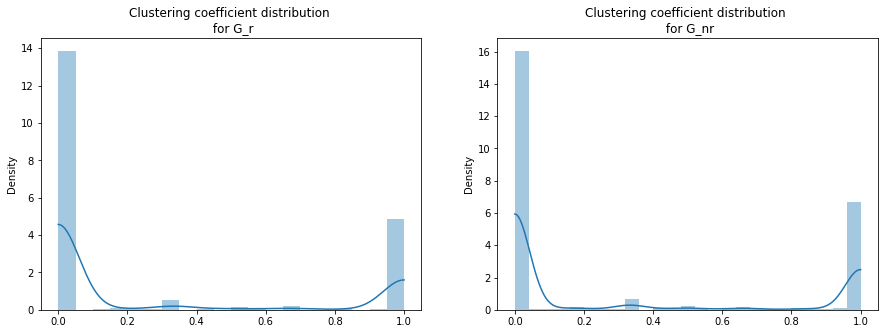

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.distplot(g_r_clustering_coefficients, kde_kws = {'clip': (0.0, 1.0)})
plt.title('Clustering coefficient distribution \n for G_r')

plt.subplot(1, 2, 2)
sns.distplot(g_nr_clustering_coefficients, kde_kws = {'clip': (0.0, 1.0)})
plt.title('Clustering coefficient distribution \n for G_nr')

Both distributions have a U-shape. Therefore, can identify the clustering coefficient distributions as a bimodal distribution: meaning, the frequency of the clustering coefficients are higher close to $0$ and $1$. Therefore, an actor within this dataset either works alone or is highly connected to others (works in a group). 

## Degree centrality of largest component

In [ ]:
g_r_degree_centrality = nx.degree_centrality(g_r)
g_nr_degree_centrality = nx.degree_centrality(g_nr)

In [ ]:
g_r_degree_centrality = pd.DataFrame(g_r_degree_centrality, index = [0])
g_nr_degree_centrality = pd.DataFrame(g_nr_degree_centrality, index = [0])

In [ ]:
g_r_largest_component_degree_centrality = nx.degree_centrality(g_r_largest_component)
g_nr_largest_component_degree_centrality = nx.degree_centrality(g_nr_largest_component)

In [ ]:
g_r_largest_component_degree_centrality = pd.DataFrame(g_r_largest_component_degree_centrality, index = [0]).transpose()
g_nr_largest_component_degree_centrality = pd.DataFrame(g_nr_largest_component_degree_centrality, index = [0]).transpose()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Degree Centrality \n for G_nr')

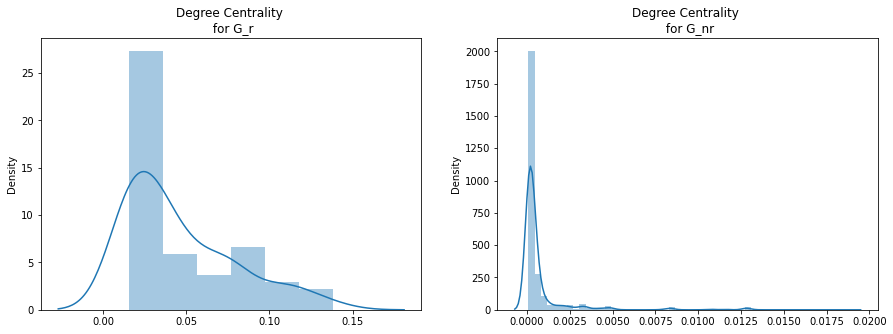

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.distplot(g_r_largest_component_degree_centrality)
plt.title('Degree Centrality \n for G_r')

plt.subplot(1, 2, 2)
sns.distplot(g_nr_largest_component_degree_centrality)
plt.title('Degree Centrality \n for G_nr')

In [ ]:
g_r_largest_component_degree_centrality.sort_values(by = 0, ascending = False).head(1)

,0
610924,0.138462


In [ ]:
g_nr_largest_component_degree_centrality.sort_values(by = 0, ascending = False).head(1)

,0
112701,0.018701


In [ ]:
print('The number of crimes of the largest component with the highest degree centrality...')
print('of G_r is: ', len(df[df['OffenderIdentifier'] == 610924]))
print('of G_nr is: ', len(df[df['OffenderIdentifier'] == 112701]))

The number of crimes of the largest component with the highest degree centrality...
of G_r is:  46
of G_nr is:  4
